Student Dataset Sample:
    Study_Hours  Attendance  Pass
0            5          60     0
1           15          90     1
2           12          85     1
3            8          70     0
4            7          65     0

Missing values:
 Study_Hours    0
Attendance     0
Pass           0
dtype: int64


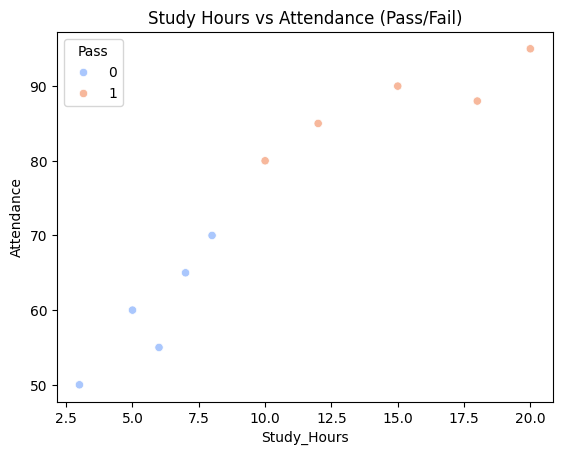


Task 1 - Accuracy: 1.00
Confusion Matrix:
 [[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Reviews Dataset Sample:
                                          Review_Text Sentiment
0  I love this product! It's fantastic and works ...  positive
1           Terrible experience, will not buy again.  negative
2    Pretty good, could be better but I'm satisfied.  positive
3            Worst purchase ever, very disappointed.  negative
4    Amazing quality and excellent customer service.  positive

Sample cleaned reviews:
                                          Review_Text  \
0  I love this product! It's fantastic and works ...   
1           Terrible experience, will not buy ag

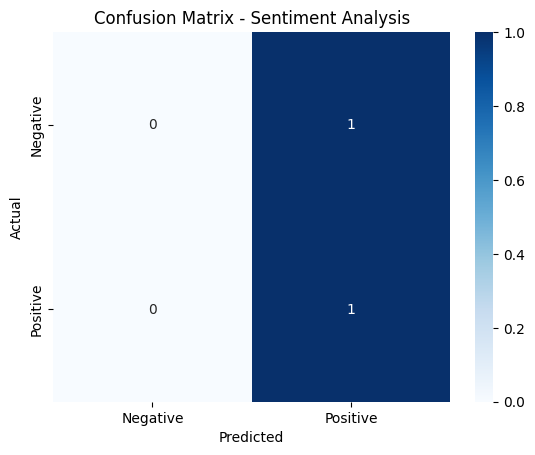

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

#  Task 1: Student Pass/Fail Prediction 

# Load student data
df_students = pd.read_csv('student_performance.csv')

print("Student Dataset Sample:\n", df_students.head())
print("\nMissing values:\n", df_students.isnull().sum())

# Plot Study Hours vs Attendance colored by Pass
sns.scatterplot(data=df_students, x='Study_Hours', y='Attendance', hue='Pass', palette='coolwarm')
plt.title('Study Hours vs Attendance (Pass/Fail)')
plt.show()

# Prepare features and target
X_students = df_students[['Study_Hours', 'Attendance']]
y_students = df_students['Pass']

# Train-test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_students, y_students, test_size=0.2, random_state=42)

# Train Logistic Regression
model_s = LogisticRegression()
model_s.fit(X_train_s, y_train_s)

# Predict and evaluate
y_pred_s = model_s.predict(X_test_s)
print(f"\nTask 1 - Accuracy: {accuracy_score(y_test_s, y_pred_s):.2f}")

print("Confusion Matrix:\n", confusion_matrix(y_test_s, y_pred_s))

print("\nClassification Report:")
print(classification_report(y_test_s, y_pred_s, zero_division=0))


# ======= Task 2: Sentiment Analysis 

# Load reviews data
df_reviews = pd.read_csv('reviews.csv')

print("\nReviews Dataset Sample:\n", df_reviews.head())

# Simple text preprocessing without external libraries
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df_reviews['Cleaned_Review'] = df_reviews['Review_Text'].apply(preprocess_text)

print("\nSample cleaned reviews:\n", df_reviews[['Review_Text', 'Cleaned_Review']].head())

# Prepare features and target
X_reviews = df_reviews['Cleaned_Review']
y_reviews = df_reviews['Sentiment']

# Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reviews, y_reviews, test_size=0.2, random_state=42)

# Pipeline: TF-IDF vectorizer + Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('logreg', LogisticRegression(max_iter=200))
])

# Train model
pipeline.fit(X_train_r, y_train_r)

# Predict and evaluate
y_pred_r = pipeline.predict(X_test_r)

print(f"\nTask 2 - Accuracy: {accuracy_score(y_test_r, y_pred_r):.2f}")

print("Confusion Matrix:")
cm_r = confusion_matrix(y_test_r, y_pred_r)
print(cm_r)

print("\nClassification Report:")
print(classification_report(y_test_r, y_pred_r, zero_division=0))

# Plot confusion matrix heatmap
sns.heatmap(cm_r, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Sentiment Analysis')
plt.show()
